In [1]:
"""
Решите задачу регрессии на наборе данных о продажах автомобилей
(например, набор данных Auto MPG) и предскажите расход топлива.
"""


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
path_to_dataset = '/Users/anastasiyafostiy/.cache/kagglehub/datasets/uciml/autompg-dataset/versions/3/auto-mpg.csv'
data = pd.read_csv(path_to_dataset)

data.replace("?", np.nan, inplace=True)
data["horsepower"] = pd.to_numeric(data["horsepower"])
data.dropna(inplace=True)

In [3]:
X = data.drop(columns=['mpg', 'car name', 'origin'])
y = data['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [4]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 2.503860089776124
MSE: 10.502370329417298
R2: 0.7942349075428592


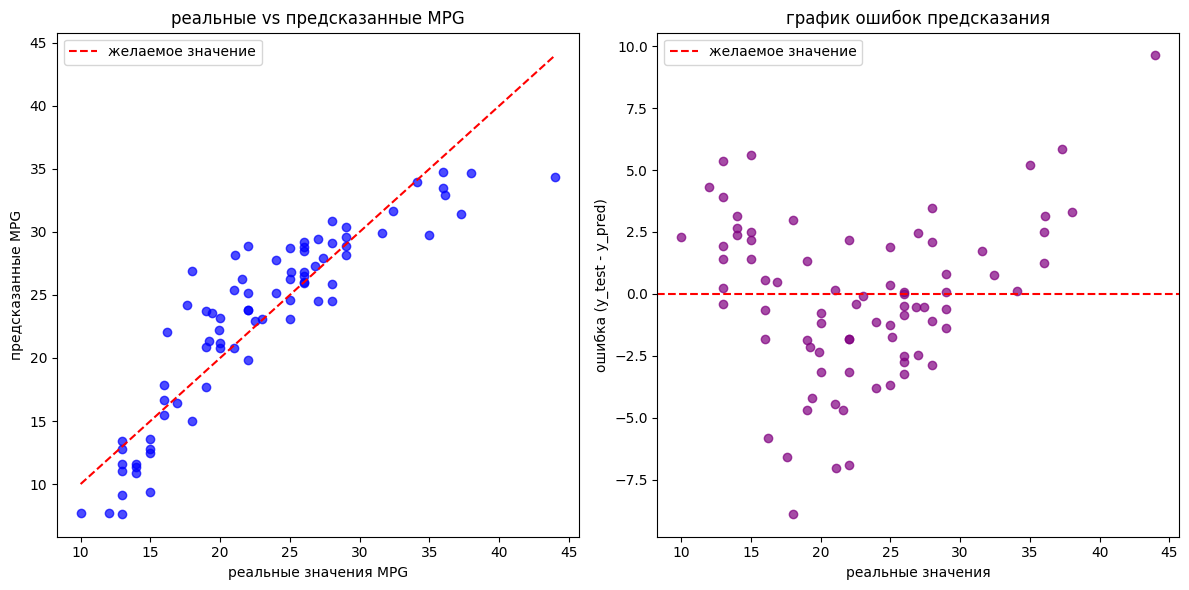

In [5]:
delta = y_test - y_pred

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(y_test, y_pred, alpha=0.7, color="blue")
axs[0].plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)],
    color="red", linestyle="dashed", label="желаемое значение"
)
axs[0].set_xlabel("реальные значения MPG")
axs[0].set_ylabel("предсказанные MPG")
axs[0].set_title("реальные vs предсказанные MPG")
axs[0].legend()

axs[1].scatter(y_test, delta, alpha=0.7, color="purple")
axs[1].axhline(y=0, color="red", linestyle="dashed", label="желаемое значение")
axs[1].set_xlabel("реальные значения")
axs[1].set_ylabel("ошибка (y_test - y_pred)")
axs[1].set_title("график ошибок предсказания")
axs[1].legend()

plt.tight_layout()
plt.show()